<a href="https://colab.research.google.com/github/mequanent/Social-Networks/blob/main/SN_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1



## Policies
1.   Any python package that can be installed with pip can be used(imported).

socore




In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

## Load the graph

We use nx.house_x_graph() as our testing example, however, we will not use this testing example for our final grading .

The exact testing data for the final grading will be an undirected graph and it will be announced after the due date.

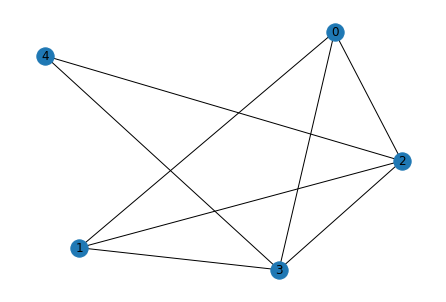

In [2]:
# load the graph
#G = nx.karate_club_graph()

G = nx.house_x_graph()
# visualize the graph
nx.draw(G, with_labels = True)

In [ ]:
print(list(nx.nodes(G))) # list of nodes
print(list(nx.edges(G))) # list of edges(start, end)
print(list(nx.degree(G))) # list of (node_id, degree(node_i))

[0, 1, 2, 3, 4]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
[(0, 3), (1, 3), (2, 4), (3, 4), (4, 2)]


Please refer to the NetworkX documentation for more details : [NetworkX](https://networkx.org/documentation/stable/reference/index.html)

## Part 1 - Degree distribution (15 points)




[0, 0, 1, 2, 2]


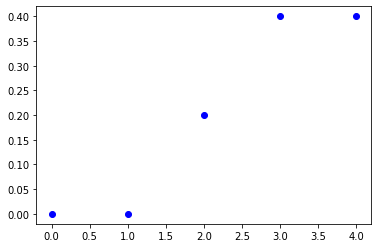

In [ ]:
def plot_degree_distribution(G):
  ''' ++++++++++++++  My part +++++++++++++++++++++++++++ ''' 
  degrees = [d for n, d in G.degree()]  # degrees in G
  # get the count for possible degrees from 0 to max degree
  degree_hist = [degrees.count(i) for i in range(max(degrees)+1)]
  ''' +++++++++++++ End of My part ++++++++++++++++++++++ '''

  print(degree_hist)
  degree_hist = np.array(degree_hist)
  degree_hist_dist = degree_hist/sum(degree_hist)
  
  x = np.arange(0, len(degree_hist))
  plt.scatter(x, degree_hist_dist , c ="blue")
  plt.show()

plot_degree_distribution(G)

## Part 2 - Network diameter (15 points)


$$diameter=\max\{\text{shortest_path}(i, j), ∀i, j \in\{0,1, ..., N-1\}\}$$
$N$ is the number of nodes.

In [ ]:
paths = nx.shortest_path(G)

print(paths[0][4])

[0, 2, 4]


Diameter = 2
[0, 2, 4]


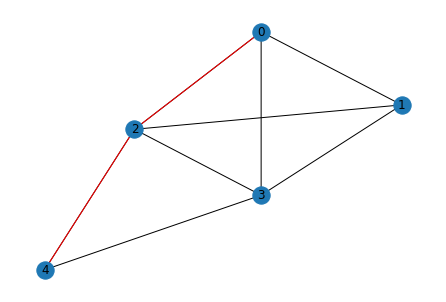

In [ ]:

def max_shortest_path_algo(paths):

  max_length = 0
  max_shortest_path = None

  ''' ++++++++++++++  My part +++++++++++++++++++++++++++ ''' 
  for i in paths:
    for j in range(len(paths[i])):
      num_edges_in_shortest_path = len(paths[i][j]) - 1
      if num_edges_in_shortest_path > max_length:
        max_length = num_edges_in_shortest_path
        max_shortest_path = paths[i][j]
  ''' +++++++++++++ End of My part ++++++++++++++++++++++ '''

  return max_shortest_path, max_length

max_shortest_path, max_length = max_shortest_path_algo(paths)
max_shortest_path_edges = []

for i in range(len(max_shortest_path)-1):
  max_shortest_path_edges.append((max_shortest_path[i], max_shortest_path[i+1]))

print("Diameter = {}".format(max_length))
print(max_shortest_path)

pos = nx.spring_layout(G)
nx.draw(G, pos=pos,  with_labels=True)
nx.draw_networkx_edges(G, edge_color='r', edgelist=max_shortest_path_edges, pos=pos)
plt.show()

## Part 3 - Clustering coeficient (15 points)

### Global clustering coefficient
$$c_{global} =3\times \frac{\text{number of triangles}}{\text{number of connected triplets}}$$



### The following method is my user defined method to determine the number of connected triplets in a graph.

In [ ]:
''' ++++++++++++++  My part +++++++++++++++++++++++++++ ''' 
def nun_of_triplets(G):
  triplets = 0
  for n in G.nodes:
    neighbors = G.neighbors(n)
    for i in neighbors:
      _2nd_neighbors = list(G.neighbors(i))
      triplets += len(_2nd_neighbors) - 1 # exclude n from neighbor of i since n is already being considered
  return triplets / 2 # devided by 2 bc (x, y, z) and (z, y, x) shouldn't be counted as two  
#''' +++++++++++++ End of My part ++++++++++++++++++++++ '''    

In [ ]:
global_clustering_coefficient = 0
''' ++++++++++++++  My part +++++++++++++++++++++++++++ ''' 
num_of_triangles = np.sum(list(nx.triangles(G).values()))/3
nun_of_connected_triplets = nun_of_triplets(G) # I defined this function above
global_clustering_coefficient = 3 * num_of_triangles / nun_of_connected_triplets
''' +++++++++++++ End of My part ++++++++++++++++++++++ '''  
print("Global clustering coefficient = {}".format(global_clustering_coefficient))


Global clustering coefficient = 0.7894736842105263


## Part 4 - Centrality (15 points)


### Betweenness Centrality
$$C_b(v_i)=\sum_{v_i\neq s \neq t}\frac {\sigma_{st}(v_i)}{\sigma_{st}}$$

$\sigma_{st}$ : the number of shortest paths from vertex $𝑠$ to $𝑡$

$\sigma_{st}(v_i)$ : the number of shortest paths from $𝑠$ to $𝑡$ that pass through $v_i$


### Closenees Centrality

$$C_c(v_i)=\frac{n-1}{\sum_{i\neq j}d(v_i, v_j)}$$

where $d(v_i, v_j)$ is the shortest-path distance between $v_i$ and  $v_j$, $n$ is the number of nodes in the graph.



In [ ]:

betweenness_centrality = {}
closeness_centrality = {}
''' ++++++++++++++  My part +++++++++++++++++++++++++++ ''' 
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
''' +++++++++++++ End of My part ++++++++++++++++++++++ '''  

print(betweenness_centrality )
print(closeness_centrality )

print("Betweenness Centrality of node 0 is {}".format(betweenness_centrality[0]))

print("Closenees Centrality of node 0 is {}".format(closeness_centrality[0]))


{0: 0.0, 1: 0.0, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.0}
{0: 0.8, 1: 0.8, 2: 1.0, 3: 1.0, 4: 0.6666666666666666}
Betweenness Centrality of node 0 is 0.0
Closenees Centrality of node 0 is 0.8


## Part 5 - Structural Equivalence (15 points)

Vertex similarity
$$s(v_i, v_j)=|N(v_i)\cap N(v_j)|$$

Jaccard similarity
$$s_{jaccard}(v_i, v_j)=\frac{|N(v_i)\cap N(v_j)|}{|N(v_i)\cup N(v_j)|}$$
Cosine similarity
$$s_{cosine}(v_i, v_j)=\frac{|N(v_i)\cap N(v_j)|}{\sqrt{|N(v_i)|\cdot|N(v_j)|}}$$

In [ ]:
def node_similarity(v, u, normalized=False): 
  neighbors_v = set(nx.neighbors(G, v)) 
  neighbors_u = set(nx.neighbors(G, u)) 

  result = 0 
  if not normalized: 
    result = len(neighbors_v.intersection(neighbors_u)) 
    return result 
  elif normalized == "cosine": 
    ''' +++++++++++++ My part +++++++++++++++++++++++++++++ '''
    numerator = len(neighbors_v.intersection(neighbors_u))
    denominator = np.sqrt(len(neighbors_v)*len(neighbors_u))
    result = numerator /  denominator
    ''' +++++++++++++ End of My part ++++++++++++++++++++++ '''  

    return result
  elif normalized == "jaccard":
    ''' +++++++++++++ My part +++++++++++++++++++++++++++++ '''
    numerator = len(neighbors_v.intersection(neighbors_u))
    denominator = len(neighbors_v.union(neighbors_u))
    result = numerator /  denominator
    ''' +++++++++++++ End of My part ++++++++++++++++++++++ '''    

    return result
  else:
    pass

print(node_similarity(0, 1)) 
print(node_similarity(0, 1, "cosine")) 
print(node_similarity(0, 1, "jaccard")) 

2
0.6666666666666666
0.5


## Part 6 - Community Detection: Girvan-Newman Algorithm (25 points)




In [ ]:

def edge_to_remove(graph): 

  edge_betweenness_centrality_dict = {} 
  ''' +++++++++++++ My part +++++++++++++++++++++++++++++ '''
  edge_betweenness_centrality_dict = nx.edge_betweenness_centrality(graph)
  ''' +++++++++++++ End of My part ++++++++++++++++++++++ ''' 

  edge = ()
  for key, value in sorted(edge_betweenness_centrality_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key 
      break 
  return edge

def girvan_newman(graph):
  # find number of connected components
  connected_component = nx.connected_components(graph)
  connected_component_count = nx.number_connected_components(graph)
  
  while(connected_component_count == 1):
    ''' +++++++++++++ My part +++++++++++++++++++++++++++++ '''
    graph.remove_edge(*edge_to_remove(graph))

    connected_component = nx.connected_components(graph)
    connected_component_count = nx.number_connected_components(graph)
    ''' +++++++++++++ End of My part ++++++++++++++++++++++ ''' 

  return connected_component    

# the communities in the graph
c = girvan_newman(G.copy())

# to list
node_groups = []

for i in c:
  node_groups.append(list(i))


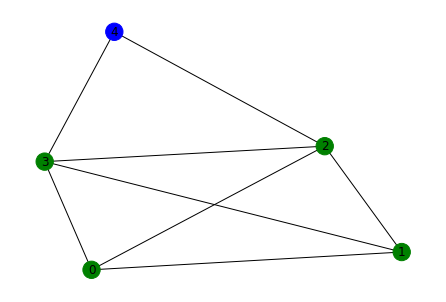

In [ ]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        #color_map.append('blue')
        color_map.append('green')
    else: 
        #color_map.append('green')
        color_map.append('blue')

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

### Note - It is possible to swap the colors. So if your blue and green are swapped, it's okay.

### ***Just to see reversed group/community color***

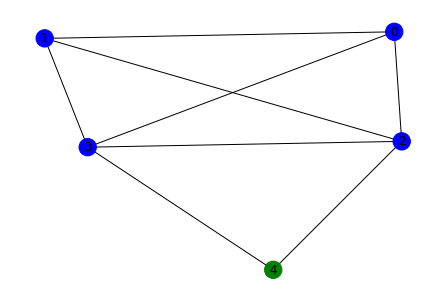

In [ ]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
        #color_map.append('green')
    else: 
        color_map.append('green')
        #color_map.append('blue')

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

## Reference 

